# ML Income Prediction

We import the necessary libraries and make the train and test datasets available.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('https://raw.githubusercontent.com/Blassaj/Icaro_Data-Science/sprint1/train1.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Blassaj/Icaro_Data-Science/sprint1/test1.csv')

## Descriptive analysis and data visualization.

We see basic characteristics of each dataset (dimensions, attributes, type of data, presence of nulls and statistical parameters of the numerical variables).

In [ ]:
df_train_graficos=df_train.copy()

In [ ]:
df_train.sample(5)

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
12972,11466,17,Private,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K,11464
640,12054,51,Self-emp-not-inc,HS-grad,9,Divorced,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K,12052
16031,14331,52,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,14328
14289,2611,36,Private,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,7688,0,50,United-States,>50K,2611
22187,26970,44,Federal-gov,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K,26954


In [ ]:
print(f'The training dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns')
print(f'The test dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns')

El dataset de entrenamiento tiene 27656 filas y 16 columnas
El dataset de testeo tiene 4881 filas y 15 columnas


In [ ]:
df_train.columns    # Names of training dataset attributes

Index(['index', 'age', 'workclass', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'ID'],
      dtype='object')

In [ ]:
df_test.columns   # Names of the attributes of the test dataset (we can see that our target= "income" is not present)

Index(['index', 'age', 'workclass', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'ID'],
      dtype='object')

In [ ]:
df_train.info()   # Type of data contained in each attribute present in the training dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27656 entries, 0 to 27655
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           27656 non-null  int64 
 1   age             27656 non-null  int64 
 2   workclass       27656 non-null  object
 3   education       27656 non-null  object
 4   education.num   27656 non-null  int64 
 5   marital.status  27656 non-null  object
 6   occupation      27656 non-null  object
 7   relationship    27656 non-null  object
 8   race            27656 non-null  object
 9   sex             27656 non-null  object
 10  capital.gain    27656 non-null  int64 
 11  capital.loss    27656 non-null  int64 
 12  hours.per.week  27656 non-null  int64 
 13  native.country  27656 non-null  object
 14  income          27656 non-null  object
 15  ID              27656 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 3.4+ MB


In [ ]:
df_test.info()   # Data type that contains each attribute present in the test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           4881 non-null   int64 
 1   age             4881 non-null   int64 
 2   workclass       4881 non-null   object
 3   education       4881 non-null   object
 4   education.num   4881 non-null   int64 
 5   marital.status  4881 non-null   object
 6   occupation      4881 non-null   object
 7   relationship    4881 non-null   object
 8   race            4881 non-null   object
 9   sex             4881 non-null   object
 10  capital.gain    4881 non-null   int64 
 11  capital.loss    4881 non-null   int64 
 12  hours.per.week  4881 non-null   int64 
 13  native.country  4881 non-null   object
 14  ID              4881 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 572.1+ KB


We see that in both the test set and the training set there is no inconsistency between them, i.e., they handle the same type of data and variables (except target, as we have already clarified above).

* Numerical variables:

  - index: discrete
  - ID: discrete
  - age: continuous (discretized)
  - education.num: discrete
  - capital.gain: continuous
  - capital.loss: continuous
  - hours.per.week: discrete
  

* Categorical variables:

  - workclass: nominal
  - education: ordinal
  - marital.status: nominal
  - occupation: nominal
  - relationship: nominal
  - race: nominal
  - sex: nominal
  - native.country: nominal 
  - income: nominal




###Descriptive statistics analysis on each dataset.

In [ ]:
round(df_train.describe(),3)   # Statistical parameters of the numerical attributes of the training dataset

NameError: ignored

In [ ]:
df_train.describe(include='O')

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,27656,27656,27656,27656,27656,27656,27656,27656,27656
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,19279,8934,12720,3539,11208,23621,18521,24811,20953


In [ ]:
df_train.income.unique()

array(['<=50K', '>50K'], dtype=object)

In the summary for categorical variables we can already see that our target variable, income, has a number of unbalanced values in its "<=50K" and ">50K" categories. That is out of 27,656 records in df_train, 20,953 correspond to people earning less than $50K.

In [ ]:
df_test.describe()   # Statistical parameters of the numeric attributes of the test dataset

,index,age,education.num,capital.gain,capital.loss,hours.per.week,ID
count,4881.000000,4881.000000,4881.000000,4881.000000,4881.000000,4881.000000,4881.000000
mean,16277.736734,38.444991,10.015571,956.353001,82.177218,40.404425,16270.460561
std,9341.930525,13.513499,2.602128,6796.996933,387.331950,12.220831,9335.005226
min,6.000000,17.000000,1.000000,0.000000,0.000000,1.000000,6.000000
25%,8278.000000,27.000000,9.000000,0.000000,0.000000,40.000000,8278.000000
50%,16173.000000,37.000000,10.000000,0.000000,0.000000,40.000000,16168.000000
75%,24343.000000,47.000000,12.000000,0.000000,0.000000,45.000000,24328.000000
max,32560.000000,90.000000,16.000000,99999.000000,3770.000000,99.000000,32536.000000


If we look at the mean, median and deviation values of each numerical variable in the summaries of each dataset we can see that their values are similar, for example, in the training dataset we have for the variable age a mean of 38.61, a standard deviation of 13.65 and a median of 37 years; if we now look at the same statistics but in the test set we observe a mean of 38.44, a deviation of 13.51 and a median of 37 years.

These values are very similar indicating the presence of randomness in the selection method of both sets.

###Missing values.

In [ ]:
df_train.isna().sum()  # We count the number of null records we have in our training dataset.

index             0
age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
ID                0
dtype: int64

In [ ]:
df_test.isna().sum()   # We count the number of null records we have in our test dataset.

index             0
age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
ID                0
dtype: int64

There are no missing values in either dataset so no imputation of any kind is required.

### Presence of unknown values

In [ ]:
# There are variables in the columns that are unknown "?", we have to find out where they are and decide what to do with them in our model.
df_categoricas = df_train.select_dtypes("object")## select the categorical variables

# we will search within the categorical variables of the data train for the unknown features

df_categoricas.apply(lambda x: x== "?", axis = 0).sum()

workclass         1539
education            0
marital.status       0
occupation        1546
relationship         0
race                 0
sex                  0
native.country     504
income               0
dtype: int64

In [ ]:
# we will search within the categorical variables of the data test for the unknown features
df_test.select_dtypes("object").apply(lambda x: x== "?", axis = 0).sum()

workclass         297
education           0
marital.status      0
occupation        297
relationship        0
race                0
sex                 0
native.country     78
dtype: int64

In [ ]:
## we will drop the rows with "?" in the data train
df_train = df_train[df_train["workclass"] != "?"]
df_train = df_train[df_train["occupation"] != "?"]
df_train = df_train[df_train["native.country"] != "?"]

In [ ]:
df_train.select_dtypes("object").apply(lambda x: x== "?", axis = 0).sum() ## we check the data train to make sure that we have dropped "?"

workclass         0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
income            0
dtype: int64

In [ ]:
## we will drop the rows with "?" in the data test
df_test = df_test[df_test["workclass"] != "?"]
df_test = df_test[df_test["occupation"] != "?"]
df_test = df_test[df_test["native.country"] != "?"]

In [ ]:
df_test.select_dtypes("object").apply(lambda x: x== "?", axis = 0).sum() ## we check the data test to make sure we have dropped "?"

workclass         0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
dtype: int64

We eliminated the unknown values in the training and test data in the columns workclass, native.country and occupation. This data corresponds to a percentage of less than 5% of the test and training data set.

###Data visualization.

We show the distribution and behavior of variables. Bart charts were used to study **categorical variables** and histograms and boxplots were used to sudy **numerical variables**.

#### Categorical variables

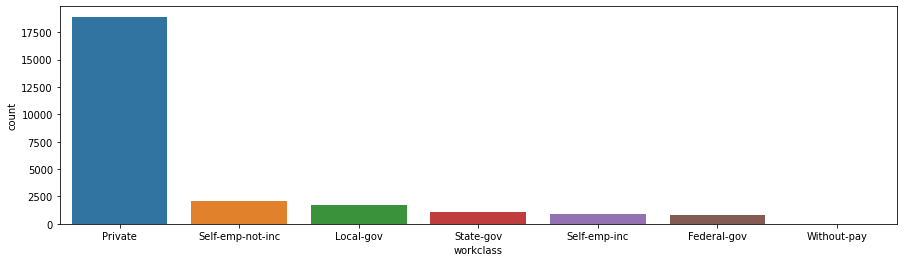

In [ ]:
# workclass variable  plot 
plt.figure(figsize=(15,4))
sns.countplot(x='workclass', data= df_train, order = df_train['workclass'].value_counts().index)
plt.show()

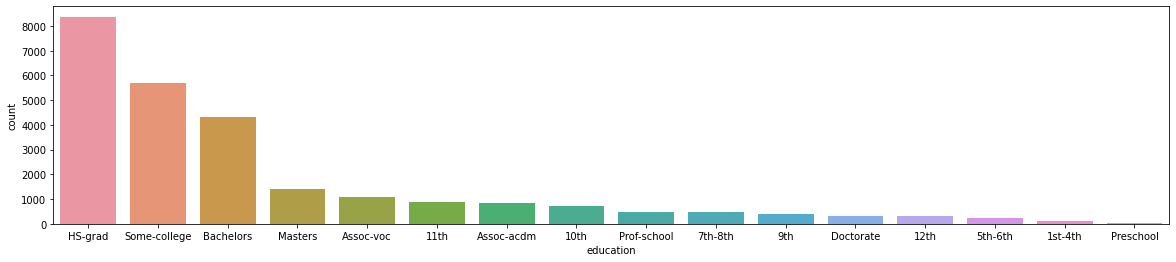

In [ ]:
# Education variable plot
plt.figure(figsize=(20,4))
sns.countplot(x='education', data= df_train, order = df_train['education'].value_counts().index)
plt.show()

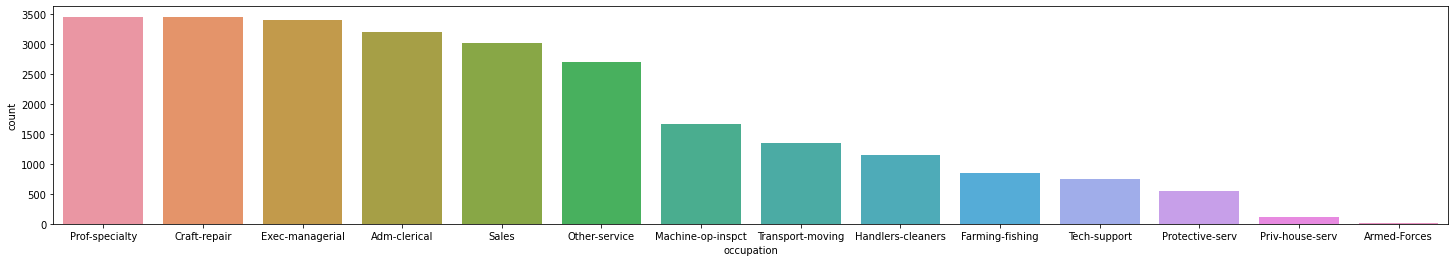

In [ ]:
#Occupation variable plot
plt.figure(figsize=(25,4))
sns.countplot(x='occupation', data= df_train, order = df_train['occupation'].value_counts().index)
plt.show()

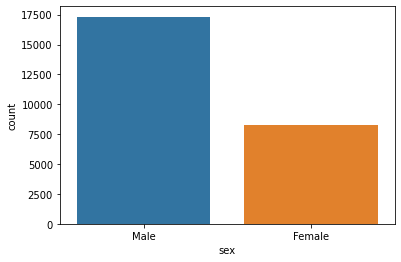

In [ ]:
# sex variable education
plt.figure(figsize=(6,4))
sns.countplot(x='sex', data= df_train, order = df_train['sex'].value_counts().index)
plt.show()

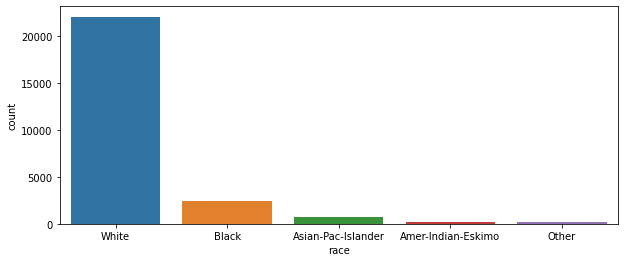

In [ ]:
# Race variable plot
plt.figure(figsize=(10,4))
sns.countplot(x='race', data= df_train, order = df_train['race'].value_counts().index)
plt.show()

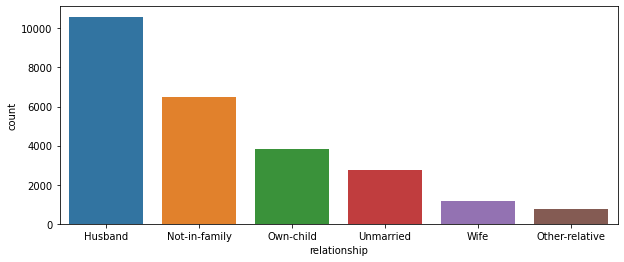

In [ ]:
# Relationship variable plot
plt.figure(figsize=(10,4))
sns.countplot(x='relationship', data= df_train, order = df_train['relationship'].value_counts().index)
plt.show()

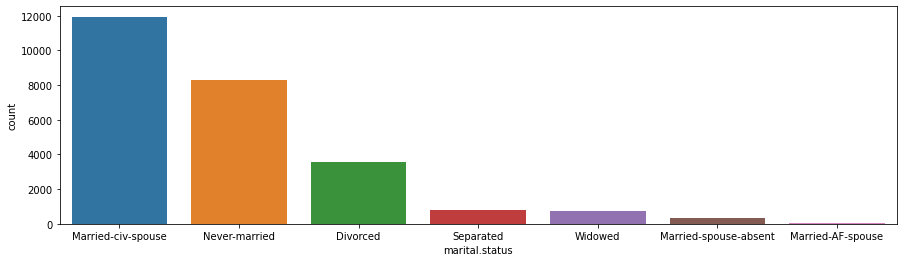

In [ ]:
# marital.status variable plot
plt.figure(figsize=(15,4))
sns.countplot(x='marital.status', data= df_train, order = df_train['marital.status'].value_counts().index)
plt.show()

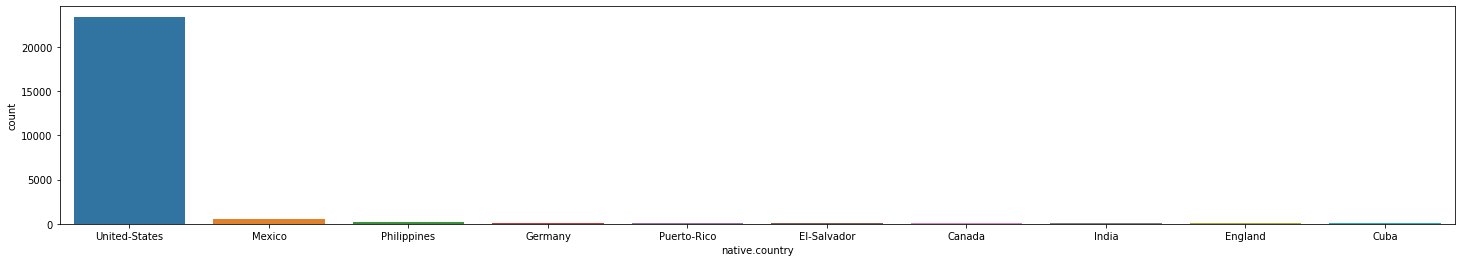

In [ ]:
# native.country variable plot
plt.figure(figsize=(25,4))
sns.countplot(x='native.country', data= df_train, order = df_train['native.country'].value_counts().iloc[:10].index)
plt.show()

In [ ]:
df_train['native.country'].unique()

array(['United-States', 'Jamaica', 'India', 'Mexico', 'Philippines',
       'Dominican-Republic', 'El-Salvador', 'China', 'Thailand',
       'Ireland', 'Laos', 'Iran', 'France', 'Guatemala', 'South',
       'Puerto-Rico', 'Japan', 'Portugal', 'Greece', 'Canada', 'Poland',
       'Peru', 'Cuba', 'Columbia', 'Germany', 'Italy', 'Hong', 'Haiti',
       'Ecuador', 'England', 'Nicaragua', 'Cambodia', 'Trinadad&Tobago',
       'Vietnam', 'Honduras', 'Taiwan', 'Scotland', 'Yugoslavia',
       'Hungary', 'Outlying-US(Guam-USVI-etc)', 'Holand-Netherlands'],
      dtype=object)

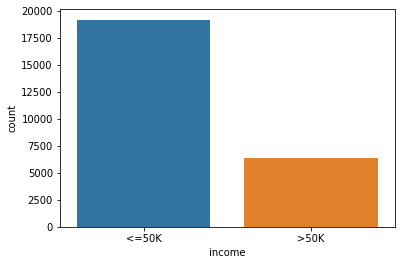

In [ ]:
# income variable plot
plt.figure(figsize=(6,4))
sns.countplot(x='income', data= df_train, order = df_train['income'].value_counts().index)
plt.show()

 **Results of the categorical variables**: 

-The variable workclass shows that most of the cases under study work in the private class.

-The education variable shows that most of the cases are high school graduates, followed by some college and bachelor's degree.

-The occupation variable shows an equal distribution for occupations with a skilled trade and craft repair, followed by a close number of cases, followed by executive positions (exec.), followed by a skilled trade and craft repair. 
followed by executive positions (exec managerial).

-In the sex variable, men predominate over women and in the race variable, the most frequent race is white, followed by black and Asian.

-In the marital status variable, there was a predominance of the Married category, followed by never married and divorced.

-In the relationship variable, it is to be expected that the majority belong to the "husband" category. Since in the gender and marital status variables, the majority are male and married respectively. 

-The most frequent category was notably United States over the rest in the Native Country variable.

-On the other hand, the income variable showed that most of the cases within the dataset have incomes less than or equal to 50k.

## Processing of categorical variables.


Taking into account that our datasets do not present nulls, we start with the processing of the categorical variables.

### Variables present in the training set and in the test set

In [ ]:
## Function to compare the data between columns of the data train and the data set
columns= ['workclass', 'education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

def comparar(columns):
  for i in columns:
      extra_test=[]
      for x in df_train[i].unique():
        if x not in df_test[i].unique():
          extra_test.append(x)
  
      print(f" La data {extra_test} se encuentra en el data train pero no en el testeo")

comparar(columns)

 La data ['Without-pay'] se encuentra en el data train pero no en el testeo
 La data ['7th-8th', '5th-6th'] se encuentra en el data train pero no en el testeo
 La data [] se encuentra en el data train pero no en el testeo
 La data [] se encuentra en el data train pero no en el testeo
 La data [] se encuentra en el data train pero no en el testeo
 La data [] se encuentra en el data train pero no en el testeo
 La data [] se encuentra en el data train pero no en el testeo
 La data ['Holand-Netherlands'] se encuentra en el data train pero no en el testeo


As there are missing elements in the test data we use replace to make the encoder in the data test.

In [ ]:
workclass_dict={ 
   # '?': 0,
    'Federal-gov': 0,
    'Local-gov': 1,
    'Private': 2,
    'Self-emp-inc': 3,
    'Self-emp-not-inc': 4,
    'State-gov': 5  
 }

df_test["workclass"]=df_test.workclass.replace(workclass_dict)

In [ ]:
# we check how many rows have this country as a native country
df_train[df_train["native.country"] == 'Holand-Netherlands'].shape[0] 

1

In [ ]:
#Only one row has this country as native, so we can remove it from our data train.
df_train = df_train.drop(df_train[df_train['native.country']=='Holand-Netherlands'].index[0], axis= 0)

### Encoder de variables categoricas

In [ ]:
# import LabelEncoder for nominal variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
# We make the encoder for the categorical variables of the data train.
df_categorical_train = df_train.select_dtypes("object").apply(le.fit_transform)

In [ ]:
## select numerical variables
df_num = df_train.select_dtypes("number")

In [ ]:
# concatenate our encoder categorical variables with our train numeric variables
df_train = pd.concat([df_num,df_categorical_train], axis= 1)

In [ ]:
# We make the encoder for the categorical variables of the data test.
columns_rest_test= ['education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
df_categorical_test = df_test[columns_rest_test].apply(le.fit_transform)
df_num_test= df_test.drop(columns_rest_test, axis=1)

# concatenate our encoder categorical variables with our test numeric variables
df_test = pd.concat([df_num_test,df_categorical_test], axis= 1)

In [ ]:
## Make sure we only have numeric variables
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22152 entries, 0 to 27654
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   index           22152 non-null  int64
 1   age             22152 non-null  int64
 2   education.num   22152 non-null  int64
 3   capital.gain    22152 non-null  int64
 4   capital.loss    22152 non-null  int64
 5   hours.per.week  22152 non-null  int64
 6   ID              22152 non-null  int64
 7   workclass       22152 non-null  int64
 8   education       22152 non-null  int64
 9   marital.status  22152 non-null  int64
 10  occupation      22152 non-null  int64
 11  relationship    22152 non-null  int64
 12  race            22152 non-null  int64
 13  sex             22152 non-null  int64
 14  native.country  22152 non-null  int64
 15  income          22152 non-null  int64
dtypes: int64(16)
memory usage: 2.9 MB


In [ ]:
## Make sure we only have numeric variables
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3769 entries, 0 to 4879
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   index           3769 non-null   int64
 1   age             3769 non-null   int64
 2   workclass       3769 non-null   int64
 3   education.num   3769 non-null   int64
 4   capital.gain    3769 non-null   int64
 5   capital.loss    3769 non-null   int64
 6   hours.per.week  3769 non-null   int64
 7   ID              3769 non-null   int64
 8   education       3769 non-null   int64
 9   marital.status  3769 non-null   int64
 10  occupation      3769 non-null   int64
 11  relationship    3769 non-null   int64
 12  race            3769 non-null   int64
 13  sex             3769 non-null   int64
 14  native.country  3769 non-null   int64
dtypes: int64(15)
memory usage: 471.1 KB


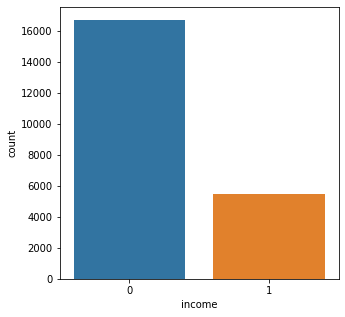

In [ ]:
## We analyze the proportions of the target "income"

fig= plt.figure()
fig.set_size_inches(5, 5)
ax1 = plt.axes()
sns.countplot(x="income", data=df_train)

In [ ]:
df_train.income.value_counts(normalize=True)

0    0.753927
1    0.246073
Name: income, dtype: float64


Our target variable was encoded as follows:

* 0 if the person earns less than 50 thousand dollars.
* 1 if the person earns more than 50 thousand dollars.


## Model

In [ ]:
# We drop the categorical attributes and the ID and index variables of the training dataset
df_train2= df_train.copy()
df_train2 = df_train2.drop(['ID', 'index'], axis= 1)

In [ ]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22152 entries, 0 to 27654
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             22152 non-null  int64
 1   education.num   22152 non-null  int64
 2   capital.gain    22152 non-null  int64
 3   capital.loss    22152 non-null  int64
 4   hours.per.week  22152 non-null  int64
 5   workclass       22152 non-null  int64
 6   education       22152 non-null  int64
 7   marital.status  22152 non-null  int64
 8   occupation      22152 non-null  int64
 9   relationship    22152 non-null  int64
 10  race            22152 non-null  int64
 11  sex             22152 non-null  int64
 12  native.country  22152 non-null  int64
 13  income          22152 non-null  int64
dtypes: int64(14)
memory usage: 3.0 MB


In [ ]:
# We drop the categorical attributes and the ID and index variables of the testing dataset
df_test2 = df_test.drop(['ID', 'index'], axis= 1)

In [ ]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3769 entries, 0 to 4879
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             3769 non-null   int64
 1   workclass       3769 non-null   int64
 2   education.num   3769 non-null   int64
 3   capital.gain    3769 non-null   int64
 4   capital.loss    3769 non-null   int64
 5   hours.per.week  3769 non-null   int64
 6   education       3769 non-null   int64
 7   marital.status  3769 non-null   int64
 8   occupation      3769 non-null   int64
 9   relationship    3769 non-null   int64
 10  race            3769 non-null   int64
 11  sex             3769 non-null   int64
 12  native.country  3769 non-null   int64
dtypes: int64(13)
memory usage: 412.2 KB


### Visual analysis: pairplot

The distributions and scatterplots that are displayed in the following pairplot were made based on a categorical variable, for example sex, only with the aim of improving exploration and visualization. We could have chosen any other qualitative variable.

In [ ]:
df_train_graficos=df_train_graficos.drop(['ID','index'], axis=1)

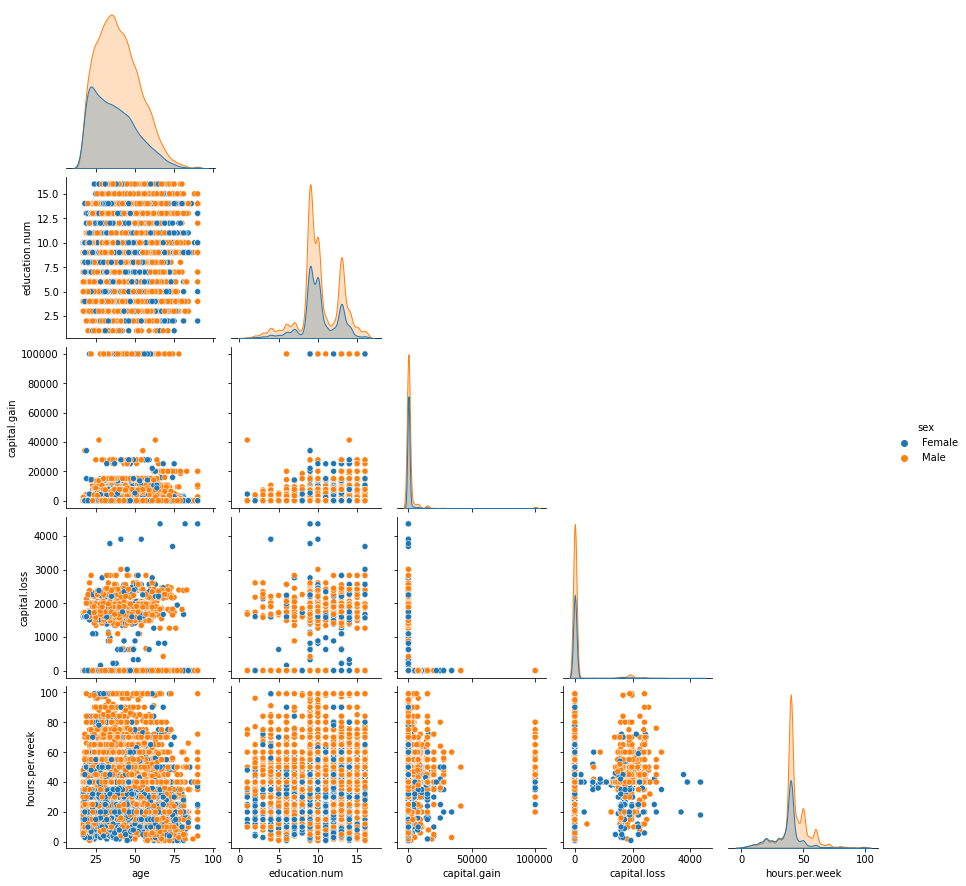

In [ ]:
sns.pairplot(df_train_graficos, hue='sex',corner=True)

With these graphs, in advance, that the numerical variables do not show signs of a linear correlation between them. For this reason we can guess that all the numerical variables must be present to train our model. The heatmap with Pearson's sample correlation coefficients will help us decide.

On the other hand, the sex variable is not capable of separating any of the numerical variables into subgroups, so it will be necessary to add more categorical variables to our model.

###Correlation Heatmap

#### General

We generate a correlation matrix between the attributes of our training set to decide which variables to start training our model with.


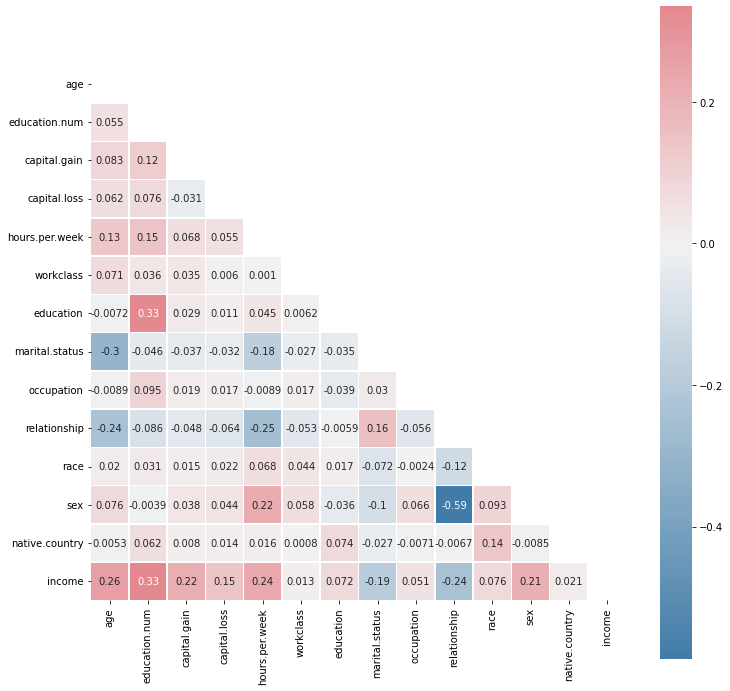

In [ ]:
# Create a mask for the top triangle of the matrix
mask = np.triu(np.ones_like(df_train2.corr(), dtype=bool))

# We generate a canvas or figure where to plot
f, ax = plt.subplots(figsize=(12, 12))

# divergent colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plot the heatmap with the correct mask and image ratio (square)
sns.heatmap(df_train2.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)

The Pearson correlation coefficients for the numerical variables are very small in absolute value, this indicates that all of them must be in the model as we anticipated with the pairplot graph.

The correlation heatmap also helps us to decide on the categorical variables transformed to numbers, although it is not recommended when one hot encoding is applied. As in our case the method used for such transformation did not increase the number of columns in the training dataset, the correlation analysis in this type of variables is not difficult. As happened with numerical features, the values ​​of the coefficients are small, so we cannot exclude any categorical variable for the prediction of our target.

#### Target correlations

To simplify the analysis, now we plot only the correlation of the attributes with our target.

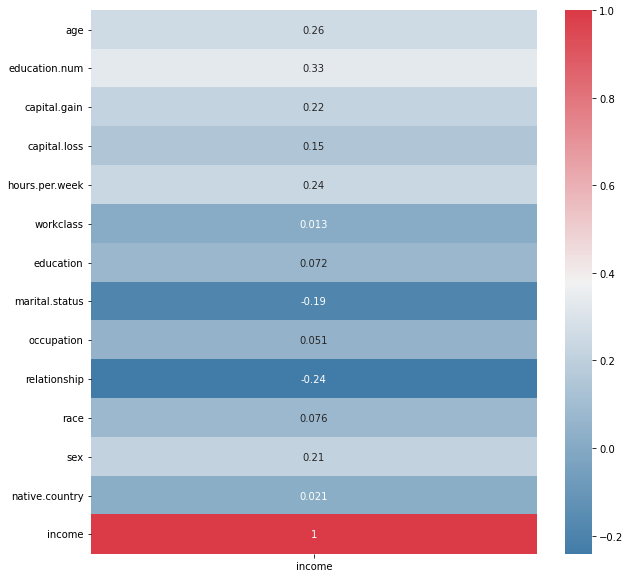

In [ ]:
target_corr = pd.DataFrame(df_train2.corr()['income'], index=df_train2.corr().index)

plt.figure(figsize=(10,10))
sns.heatmap(target_corr, annot=True, cmap=cmap)

plt.show()

ese significantly small values ​​confirm that no variable should be excluded from the model.


### Decision tree

#### Base Line Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [ ]:
# We import the necessary library to subdivide the training dataset.
from sklearn.model_selection import train_test_split

In [ ]:
# We subdivide the training dataset (the only one that contains information about our target), and we will only use the numeric variables
Xbl = df_num
ybl = df_train2["income"]

X_train, X_test, y_train, y_test = train_test_split(Xbl, ybl, test_size=0.2, random_state= 0, stratify=ybl) 

tree= DecisionTreeClassifier(max_depth=5)

tree.fit(X_train,y_train)

train_preds = tree.predict(X_train)
test_preds = tree.predict(X_test)

acc_train = accuracy_score(y_train, train_preds)
acc_test = accuracy_score(y_test, test_preds)

print(f" nuestro modelo base tiene un accuracy para la data train de : {acc_train}")

print(f" nuestro modelo base tiene un accuracy para la data test de : {acc_test}")


 nuestro modelo base tiene un accuracy para la data train de : 0.8283392585068563
 nuestro modelo base tiene un accuracy para la data test de : 0.8259986459038592


#### First evaluation of the max_depth hyperparameter

In [ ]:
# Subdividimos el dataset de entrenamiento (el único que contiene información de nuestro target)
X = df_train2.drop(['income'], axis= 1)
y = df_train2["income"]

As we saw in the bar chart and in the summary of statistics for the income variable, the number of values ​​for each of the two categories are not balanced in similar proportions. For this reason, it is necessary to use the "stratify" attribute, which preserves the proportion of how the data is distributed in the target column and represents that same distribution proportion in train_test_split.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42, stratify=y) 

In [ ]:
# We train our DecisionTree by evaluating different depths of the tree to determine the optimal point between under and overfittingmax_depths = np.arange(1, 20)
train_acc_scores = []
test_acc_scores = []

for i in max_depths:
  tree = DecisionTreeClassifier(max_depth=i)

  tree.fit(X_train, y_train)
  train_preds = tree.predict(X_train)
  test_preds = tree.predict(X_test)

  train_acc_scores.append(accuracy_score(y_train, train_preds))
  test_acc_scores.append(accuracy_score(y_test, test_preds))

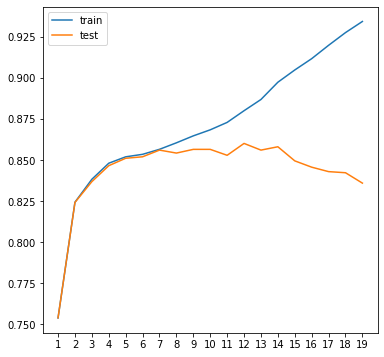

In [ ]:
# Plot the accuracy values ​​for our training and test dataset.
plt.figure(figsize=(6,6))

plt.plot(max_depths, train_acc_scores, label="train")
plt.plot(max_depths, test_acc_scores,  label="test")
plt.xticks(max_depths)
plt.legend()

We see how the accuracy increases as the max depth increases, but from depth 7, both lines separate (it begins to overfit) so we will advance with a max_depth= ​​7.

In [ ]:
# We train the tree with max_depth= ​​7 (including cross validation).
## f1 score is more useful for unbalanced classes like this data set
from sklearn.metrics import f1_score 


tree_final = DecisionTreeClassifier(max_depth= 7)
tree.fit(X_train, y_train)
train_preds = tree.predict(X_train)
test_preds = tree.predict(X_test)

In [ ]:
# We evaluate the prediction metrics on our target
acc = accuracy_score(y_test, test_preds)
f_score = f1_score(y_test, test_preds)

print(f'The accuracy achieved from a decision tree model was: {acc}')
print(f'The f-score achieved from a decision tree model was: {f_score}')

La exactitud lograda a partir de un modelo de arbol de decisión fue: 0.8366057323403295
El f-score logrado a partir de un modelo de arbol de decisión fue: 0.6495643756050339


##### Confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


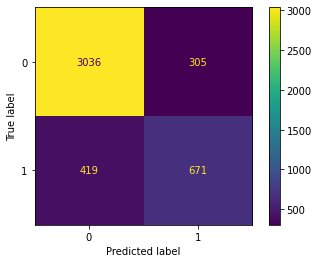

In [ ]:
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(tree, X_test, y_test)

##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3341
           1       0.69      0.62      0.65      1090

    accuracy                           0.84      4431
   macro avg       0.78      0.76      0.77      4431
weighted avg       0.83      0.84      0.83      4431



##### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
tree_scores = cross_val_score(tree, X, y, cv=5) 

In [ ]:
tree_scores

array([0.83434891, 0.81900248, 0.83069977, 0.82663657, 0.8275395 ])

In [ ]:
tree_mean=tree_scores.mean()

print(f" The mean score of our model remains at {tree_mean}")

 La media del score de nuestro modelo se mantiene en 0.8276454468899346


##### GridSearch 



We do an exhaustive hyperparameter search using Grid Search.

In [ ]:
from sklearn.model_selection import GridSearchCV



We define our **parameters** as follows:
- max_depth: range(1,15)
- min_samples_split: range(1,10)
- min_samples_leaf: range(1,10)

In [ ]:
parameters = {
    'max_depth': range(1, 15, 1),
    'min_samples_split': range(1, 15, 1),
    'min_samples_leaf': range(1, 15, 1)
}

We train the model with **different hyperparameters**, performing **cross validation**.

In [ ]:
gs = GridSearchCV(tree, parameters, scoring="accuracy", cv=5)
gs.fit(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
980 fits failed out of a total of 13720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
980 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a fl

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=19),
             param_grid={'max_depth': range(1, 15),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(1, 15)},
             scoring='accuracy')


The following table ranks the best hyperparameters obtained according to GridSearchCV.

In [ ]:
gs.cv_results_
grid_table = pd.DataFrame(gs.cv_results_)
grid_table.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1565,0.025522,0.000136,0.002613,0.000092,8,14,12,"{'max_depth': 8, 'min_samples_leaf': 14, 'min_...",0.857546,0.843962,0.846783,0.858352,0.85553,0.852435,0.005907,1
1557,0.025707,0.000708,0.002513,0.000027,8,14,4,"{'max_depth': 8, 'min_samples_leaf': 14, 'min_...",0.857546,0.843962,0.846783,0.858352,0.85553,0.852435,0.005907,1
1558,0.025711,0.000390,0.002609,0.000113,8,14,5,"{'max_depth': 8, 'min_samples_leaf': 14, 'min_...",0.857546,0.843962,0.846783,0.858352,0.85553,0.852435,0.005907,1
1559,0.027465,0.002887,0.002874,0.000504,8,14,6,"{'max_depth': 8, 'min_samples_leaf': 14, 'min_...",0.857546,0.843962,0.846783,0.858352,0.85553,0.852435,0.005907,1
1566,0.026756,0.000833,0.002900,0.000498,8,14,13,"{'max_depth': 8, 'min_samples_leaf': 14, 'min_...",0.857546,0.843962,0.846783,0.858352,0.85553,0.852435,0.005907,1


In [ ]:
print(f"The best hyperparameters are:{gs.best_params_}")

Los mejores hiperparametros son: {'max_depth': 8, 'min_samples_leaf': 14, 'min_samples_split': 4}


In [ ]:
train_preds = gs.predict(X_train)
test_preds = gs.predict(X_test)

###### Classification Report

Ranking report using the best parameters found with GridSearch

In [ ]:
print('Classification report for training data\n')
print(classification_report(y_train, train_preds))
print('Classification report for test data\n')
print(classification_report(y_test, test_preds))

Reporte de clasificación para los datos de entrenamiento

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     13360
           1       0.80      0.55      0.66      4361

    accuracy                           0.86     17721
   macro avg       0.83      0.75      0.78     17721
weighted avg       0.85      0.86      0.85     17721

Reporte de clasificación para los datos de test

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      3341
           1       0.81      0.54      0.65      1090

    accuracy                           0.86      4431
   macro avg       0.84      0.75      0.78      4431
weighted avg       0.85      0.86      0.84      4431



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, n_estimators = 200, n_jobs = -1, random_state=0)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)



#### Classification report

In [ ]:
print('Classification report for training data\n')
print(classification_report(y_train, y_train_pred))
print('Classification report for test data\n')
print(classification_report(y_test, y_test_pred))

Reporte de clasificación para los datos de entrenamiento

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     13360
           1       0.84      0.58      0.68      4361

    accuracy                           0.87     17721
   macro avg       0.86      0.77      0.80     17721
weighted avg       0.87      0.87      0.86     17721

Reporte de clasificación para los datos de test

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      3341
           1       0.82      0.54      0.65      1090

    accuracy                           0.86      4431
   macro avg       0.84      0.75      0.78      4431
weighted avg       0.85      0.86      0.85      4431



#### FeaturesImportance

In [ ]:
fi = pd.DataFrame(columns=["FEATURE", "IMPORTANCE"])
fi["FEATURE"] = X_train.columns
fi["IMPORTANCE"] = clf.feature_importances_
fi = fi.sort_values("IMPORTANCE", ascending=False)

The importance of the features is described in the following barplot:

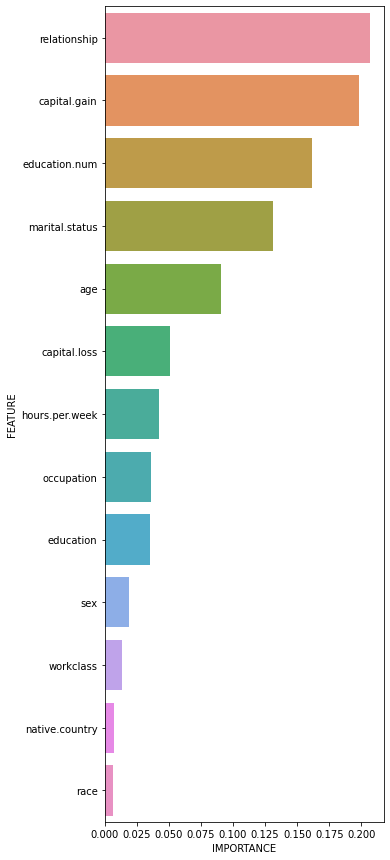

In [ ]:
plt.figure(figsize=(5, 15))
sns.barplot(y=fi.FEATURE, x=fi.IMPORTANCE)
plt.show()

### K- Nearest Neighbors

We are going to train a model of $K$ nearest neighbors to contrast with the metrics obtained in the previous models.

In [ ]:
# We subdivide the training dataset (the only one that contains information about our target)
X2 = df_train2.drop(['income'], axis= 1)
y2 = df_train2["income"]

In [ ]:
#We standardize the data to optimize the result of the proposed model.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state= 0, stratify=y2)

In [ ]:
# We import the KNN library and generate the model

from sklearn.neighbors import KNeighborsClassifier

n_neighbors = np.arange(1, 20)
train_acc_scores3 = []
test_acc_scores3 = []

for i in n_neighbors:
  knn = KNeighborsClassifier(n_neighbors= i, weights='uniform')

  knn.fit(X_train, y_train)
  train_preds = knn.predict(X_train)
  test_preds = knn.predict(X_test)

  train_acc_scores3.append(accuracy_score(y_train, train_preds))
  test_acc_scores3.append(accuracy_score(y_test, test_preds))

**First approximation to the choice of** $K$

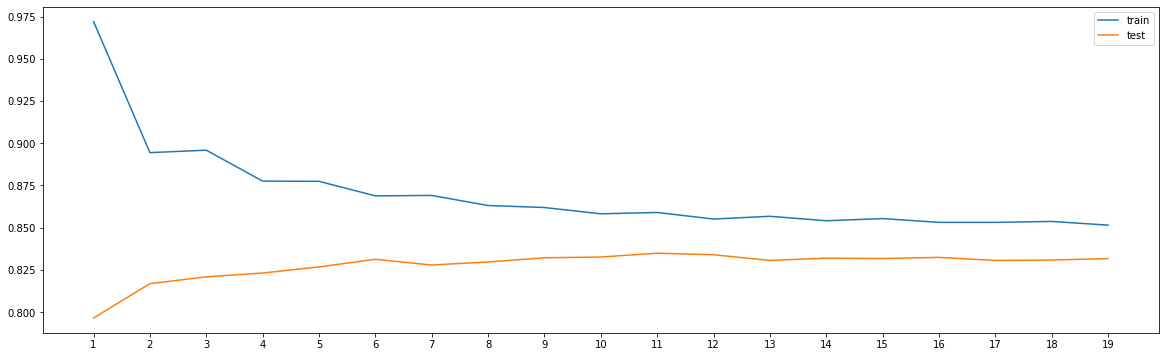

In [ ]:
# Plot the accuracy values ​​for our training and test dataset.
plt.figure(figsize=(20,6))

plt.plot(n_neighbors, train_acc_scores3, label="train")
plt.plot(n_neighbors, test_acc_scores3,  label="test")
plt.xticks(n_neighbors)
plt.legend()

In the graph we see that from k=16 or 17 both lines begin to approach each other and maintain a constant behavior. Let's see by means of a GridSearch if this first approximation to the choice of $K$ can be improved, also playing with other parameters such as 'distance' and 'weights'.


#### GridSearch

In [ ]:
k_list = list(range(1,31))

In [ ]:
parameters= {
    'n_neighbors': k_list ,
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
    }



In [ ]:
grid = GridSearchCV(knn, parameters, cv=5, scoring='accuracy')

In [ ]:
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

We show the top positions that give us an idea of ​​the best hyperparameters for the model.

In [ ]:
grid.cv_results_
grid_table_knn = pd.DataFrame(grid.cv_results_)
grid_table_knn.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
92,0.023291,0.000657,1.209238,0.009239,manhattan,17,uniform,"{'metric': 'manhattan', 'n_neighbors': 17, 'we...",0.842313,0.835214,0.839165,0.841986,0.839165,0.839569,0.002556,1
96,0.023193,0.000160,1.224601,0.005945,manhattan,19,uniform,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.844006,0.833239,0.839447,0.836907,0.843397,0.839399,0.004034,2
104,0.023462,0.000304,1.254633,0.006535,manhattan,23,uniform,"{'metric': 'manhattan', 'n_neighbors': 23, 'we...",0.846262,0.835497,0.837754,0.834086,0.843397,0.839399,0.004675,3
110,0.023370,0.000205,1.270747,0.008253,manhattan,26,uniform,"{'metric': 'manhattan', 'n_neighbors': 26, 'we...",0.845980,0.832957,0.838600,0.835779,0.843397,0.839343,0.004786,4
108,0.023703,0.000817,1.267253,0.007686,manhattan,25,uniform,"{'metric': 'manhattan', 'n_neighbors': 25, 'we...",0.845416,0.836343,0.835779,0.836625,0.841422,0.839117,0.003743,5



Summary with test statistics for the best parameters.

In [ ]:
grid_table_rank_knn= grid_table_knn[['params','mean_test_score','std_test_score','rank_test_score']].loc[grid_table_knn['rank_test_score']==1].sort_values(by='std_test_score', ascending=True)
grid_table_rank_knn

,params,mean_test_score,std_test_score,rank_test_score
92,"{'metric': 'manhattan', 'n_neighbors': 17, 'we...",0.839569,0.002556,1



As we can see, there is only one best position based on the mean and deviation of the accuracy in the test. This shows us the best hyperparameters:

In [ ]:
print("The best value of k = {} with an accuracy of {}.".format(grid.best_params_,grid.best_score_))

El mejor valor de k = {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'} con un accuracy de 0.8395687182213847.


We train the final model using cross-validation, based on the best hyperparameters obtained.

In [ ]:
from sklearn.model_selection import cross_val_score

knn_final = KNeighborsClassifier(n_neighbors= 17, weights='uniform', metric= 'manhattan' )
knn_cross = cross_val_score(knn_final, X2, y2, cv=5, scoring= 'accuracy')

acc_mean1 = knn_cross.mean()
acc_std_dev1 = knn_cross.std()

print(f'The mean accuracy achieved from a knn model was: {acc_mean1} with a standard deviation of {acc_std_dev1}')

La exactitud media lograda a partir de un modelo de knn fue: 0.8372158907104827 con un desvío estandar de 0.004074694007446211


In [ ]:
knn_cross1 = cross_val_score(knn_final, X2, y2, cv=5, scoring= 'f1')

f1_mean1 = knn_cross1.mean()
f1_std_dev1 = knn_cross1.std()

print(f'The mean f-score achieved from a knn model was: {f1_mean1} with a standard deviation of {f1_std_dev1}')

El f-score medio logrado a partir de un modelo de knn fue: 0.6409744642245744 con un desvío estandar de 0.007498795174245869


#### Classification report

Classification report using the best parameters

In [ ]:
knn_final.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

## get the classification report
print('Classification report for training data\n')
print(classification_report(y_train, y_train_pred))
print('Classification report for test data\n')
print(classification_report(y_test, y_test_pred))

Reporte de clasificación para los datos de entrenamiento

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     13360
           1       0.73      0.62      0.67      4361

    accuracy                           0.85     17721
   macro avg       0.81      0.77      0.79     17721
weighted avg       0.85      0.85      0.85     17721

Reporte de clasificación para los datos de test

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3341
           1       0.68      0.60      0.64      1090

    accuracy                           0.83      4431
   macro avg       0.78      0.75      0.76      4431
weighted avg       0.83      0.83      0.83      4431



#### Confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


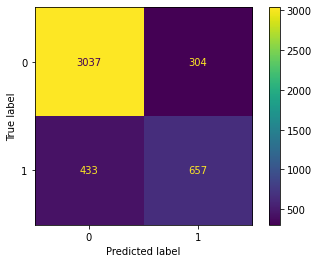

In [ ]:
plot_confusion_matrix(knn_final, X_test, y_test)

# Model selection

Below we present a summary of the metrics that we are going to use for the choice of the model.

In [ ]:
columnas=['Tree', 'RandomForest', ' KNN']
filas= ['f1-score_test_0', 'f1-score_test_1', 'accuracy_test']
datos= [[0.89, 0.90, 0.89],[0.64, 0.64, 0.64], [0.84, 0.85, 0.83]]
resumen_metricas_test = pd.DataFrame(datos, columns=columnas, index=filas)
resumen_metricas_test

,Tree,RandomForest,KNN
f1-score_test_0,0.89,0.90,0.89
f1-score_test_1,0.64,0.64,0.64
accuracy_test,0.84,0.85,0.83



For each model analyzed in the test dataset, f1-score_test_0 indicates the value of f1-score in the classification for the 0 category of our target variable, that is, those people who earn 50,000 dollars or less. In the same way, f1-score_test_1 gives us the magnitude of f1-score in the classification of those people who earn more than 50,000 dollars (category associated with values ​​equal to 1)

The models that have been analyzed so far are:

* Decision tree
*Random Forest
* K-Nearest Neighbors




One of the metrics we took into account to define our model was the F1_score, since this allows us to better describe a dataset with unbalanced classes like the ones we have.

In the case of the Decision Tree models, the classification metrics improved with the adjustment of the hyperparameters, especially when gridsearch is used for these definitions. We also performed the analysis for a K-Nearest Neighbors model using the same methodology as in the tree model, where the metrics did not make any difference (particularly the one we chose for selection, F1_score), so these two models are equally significant. However, the K-Nearest Neighbors model is more affected by the presence of outliers than Decision Trees, and although an attempt has been made to clean variables such as hours.per.week or capital.gain/loss, a more detailed analysis in the treatment of outliers, investigating more exhaustively the behavior of these variables in their context. Given this caveat, decision trees would carry more weight in the choice.

Finally, observing the summary presented in the previous table, the Random Forest model would be the one we would choose for the prediction of our target variable since we would obtain a better metric of F1_score, being the characteristics "capital.gain","relationship","education .num" the most important for the metric.

The model selected to predict the test data is:

* Random Forest


# Test data evaluation


**We predict the target for the test data with the Random Forest model**

In [ ]:
df_test2["income"] = clf.predict(df_test2) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
predict=pd.concat([df_test.ID,df_test2.income], axis = 1) 